# 1- **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# 2- **Helper Functions**

In [2]:
#Pie Plot for categorical features

def pie_plot_categ(categorical_features, colors, title):
    plt.figure(figsize=(12, 8))
    categ_feature_count = df[categorical_features].value_counts()
    plt.pie(categ_feature_count, labels = categ_feature_count.index,
            autopct='%1.1f%%', colors=colors, textprops={'fontsize':18})
    centre_circle = plt.Circle((0,0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    if title:
        plt.title(title, fontsize=18)

In [3]:
#Count Plot for categorical features
def count_plot_categ(categorical_feature, colors, df, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=categorical_feature, data=df, palette=colors)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.show()

In [4]:
#Hist Plot for Numerical Features
def hist_plot_num(numerical_feature, color, df, bins, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(10, 8))
    ax = sns.histplot(x=numerical_feature, data=df, color=color, kde="True", bins=bins)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    for container in ax.containers:
        ax.bar_label(container, fontsize=7)
    plt.show()

# 3- **Data Exploration**

In [5]:
df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")

In [6]:
df.shape

(6607, 20)

In [7]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [8]:
df.shape

(6607, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [10]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [11]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# 4- **Data Cleaning**

## - Check for Null Values

In [12]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
nulls_1 = df["Teacher_Quality"].isna().sum()/len(df)*100
print(f'Null values percentage is {nulls_1:.2f}%')

Null values percentage is 1.18%


In [15]:
nulls_2 = df["Parental_Education_Level"].isna().sum()/len(df)*100
print(f'Null values percentage is {nulls_2:.2f}%')

Null values percentage is 1.36%


In [16]:
nulls_3 = df["Distance_from_Home"].isna().sum()/len(df)*100
print(f'Null values percentage is {nulls_3:.2f}%')

Null values percentage is 1.01%


### - since the null value precentage is less than 5%, we will drop the rows with null values


In [17]:
df = df.dropna()

In [18]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

# 5- Data Visualization

### - Split Categorical and Numerical Columns

In [20]:
categorical_features = []
numerical_features = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print("Categorical features are", categorical_features)
print("-"*135)
print("Numerical features are", numerical_features)

Categorical features are ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
---------------------------------------------------------------------------------------------------------------------------------------
Numerical features are ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


## - Binary Categorical Features

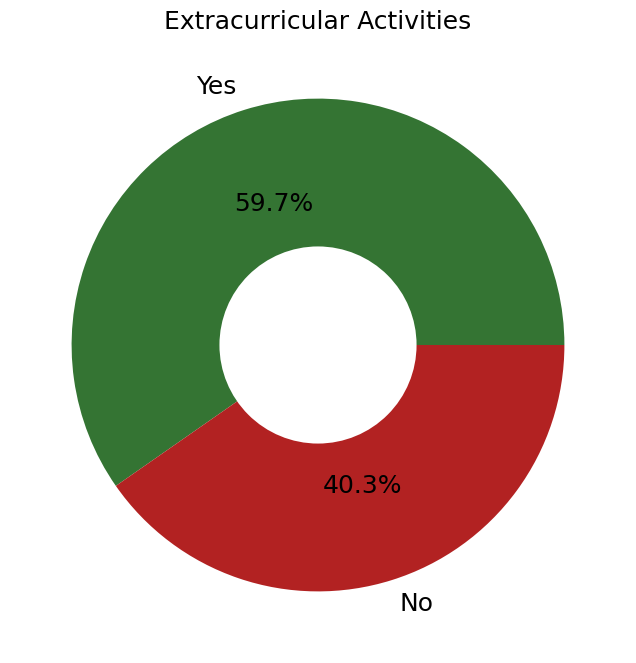

In [21]:
colors = ["#347433", "#B22222"]
pie_plot_categ("Extracurricular_Activities", colors, "Extracurricular Activities")

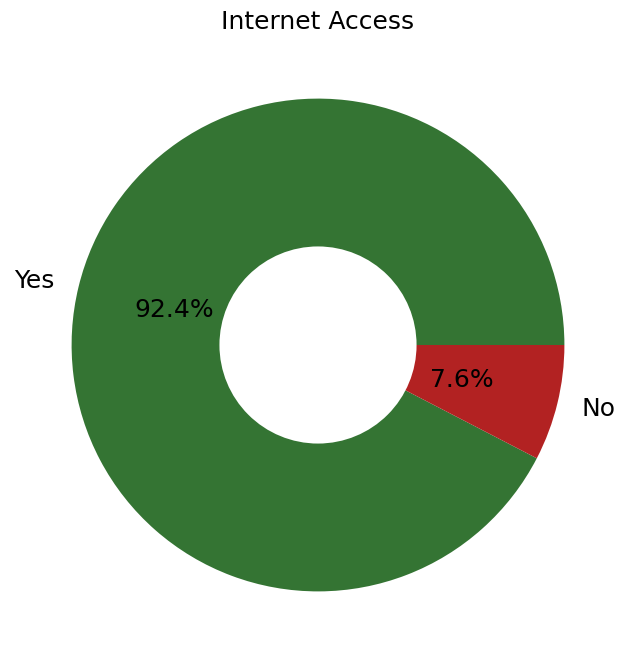

In [22]:
colors = ["#347433", "#B22222"]
pie_plot_categ("Internet_Access", colors, "Internet Access")

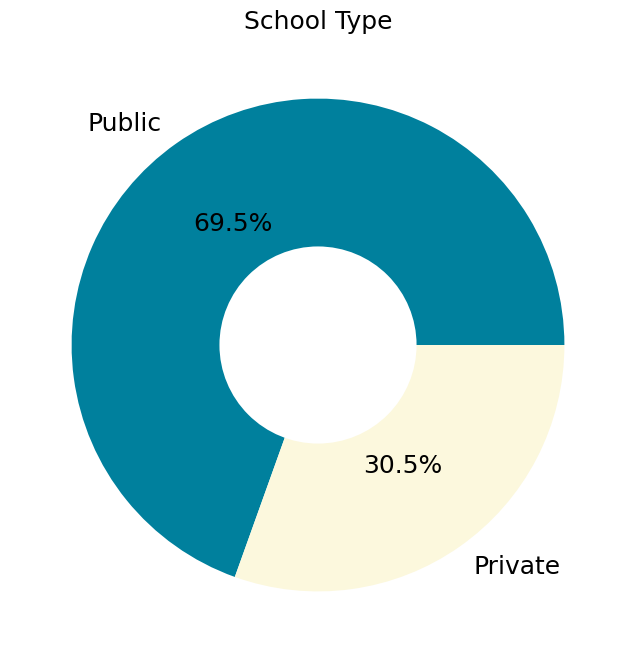

In [23]:
colors = ["#00809D", "#FCF8DD"]
pie_plot_categ("School_Type", colors, "School Type")

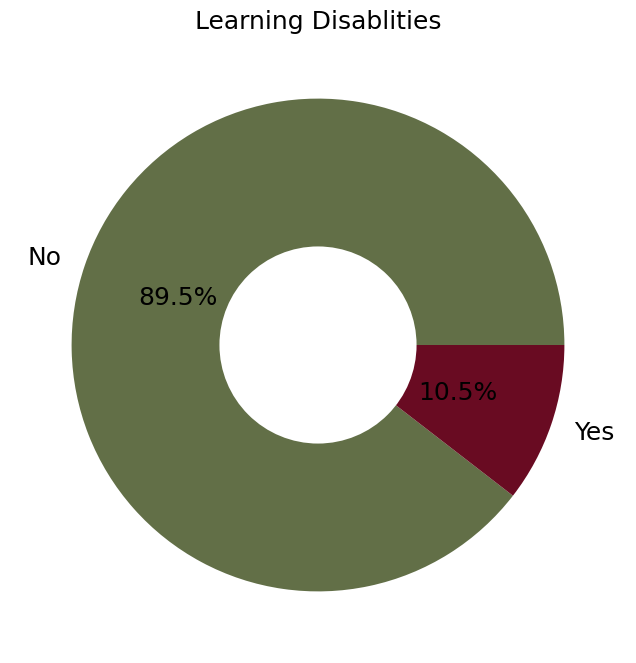

In [24]:
colors = ["#626F47", "#690B22"]
pie_plot_categ("Learning_Disabilities", colors, "Learning Disablities")

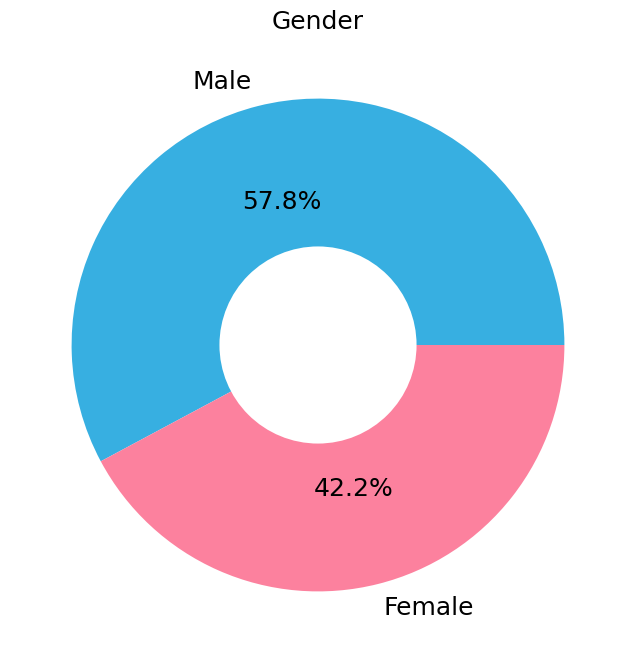

In [25]:
colors = ["#37AFE1", "#FC819E"]
pie_plot_categ("Gender", colors, "Gender")

## - Multiclass Categorical Features

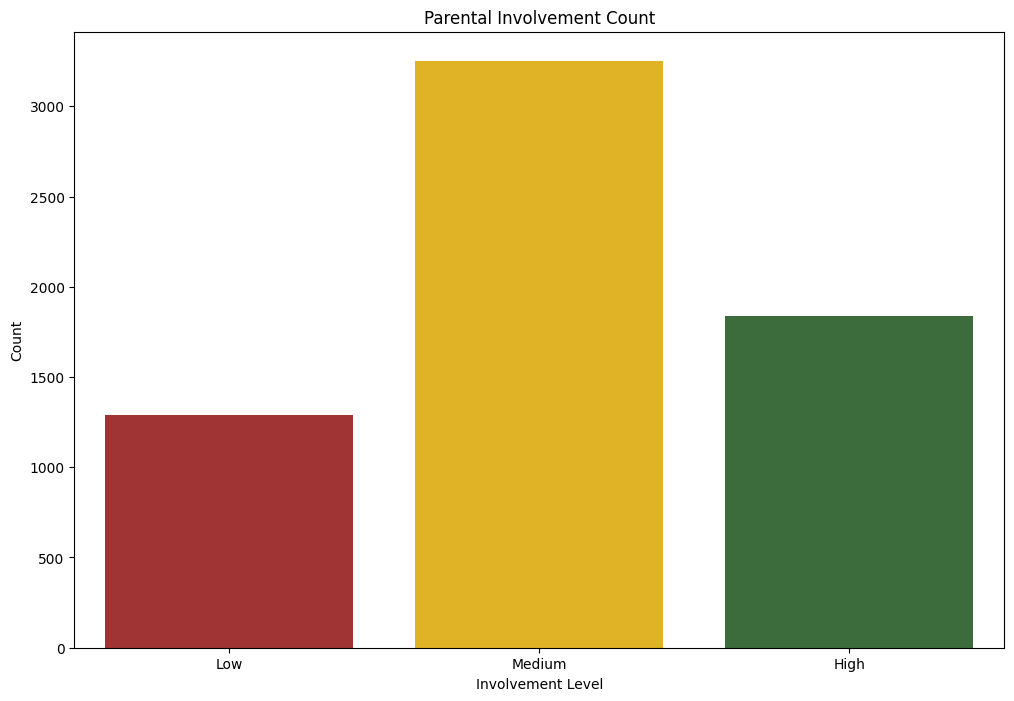

In [26]:
colors = ["#B22222", "#FFC107", "#347433"]
count_plot_categ("Parental_Involvement", colors, df,
                 "Parental Involvement Count",
                 "Involvement Level",
                 "Count")

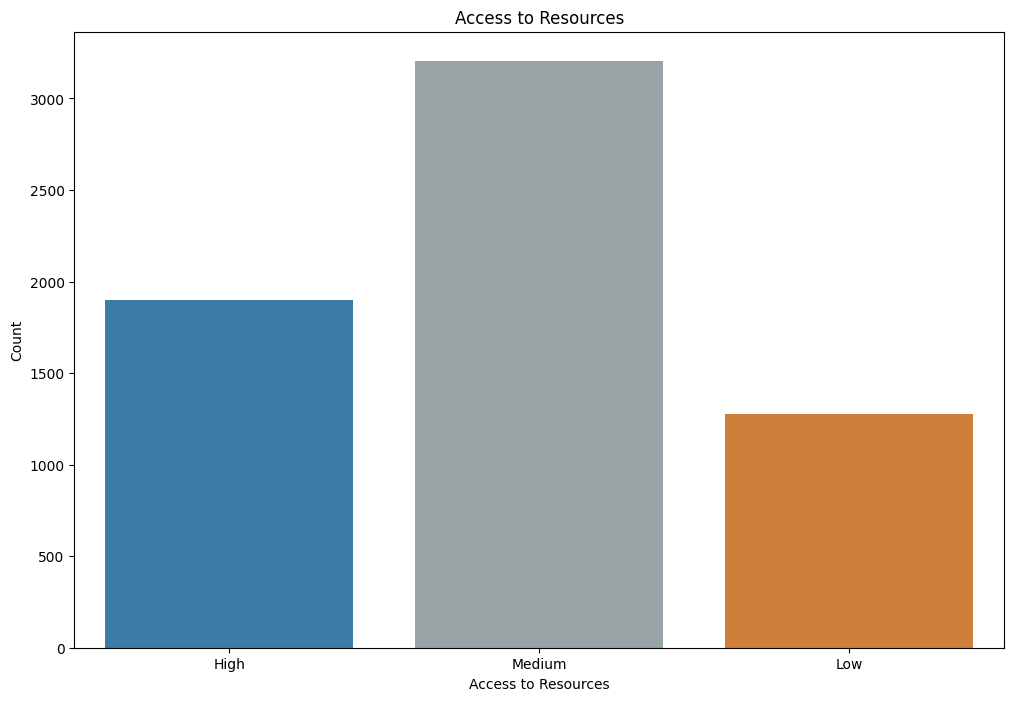

In [27]:
colors = ["#2980B9", "#95A5A6", "#E67E22"]
count_plot_categ("Access_to_Resources", colors, df,
                 "Access to Resources",
                 "Access to Resources",
                 "Count")

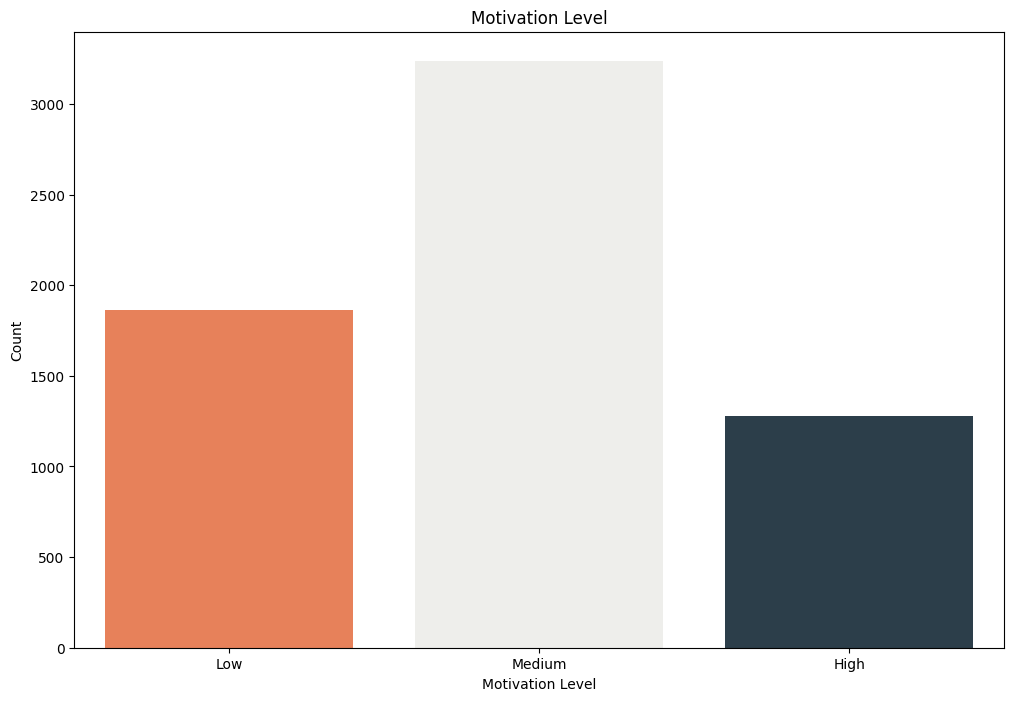

In [28]:
colors = ["#FE7743", "#EFEEEA", "#273F4F"]
count_plot_categ("Motivation_Level", colors, df,
                 "Motivation Level",
                 "Motivation Level",
                 "Count")

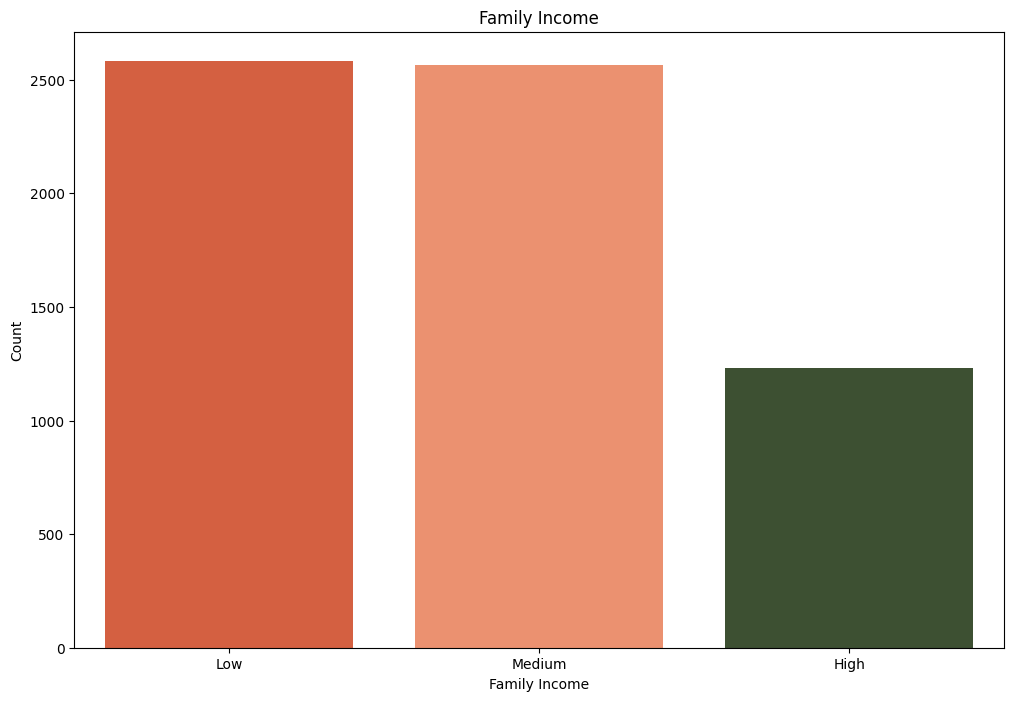

In [29]:
colors = ["#EC5228", "#FF885B", "#3C552D"]
count_plot_categ("Family_Income", colors, df,
                 "Family Income",
                 "Family Income",
                 "Count")

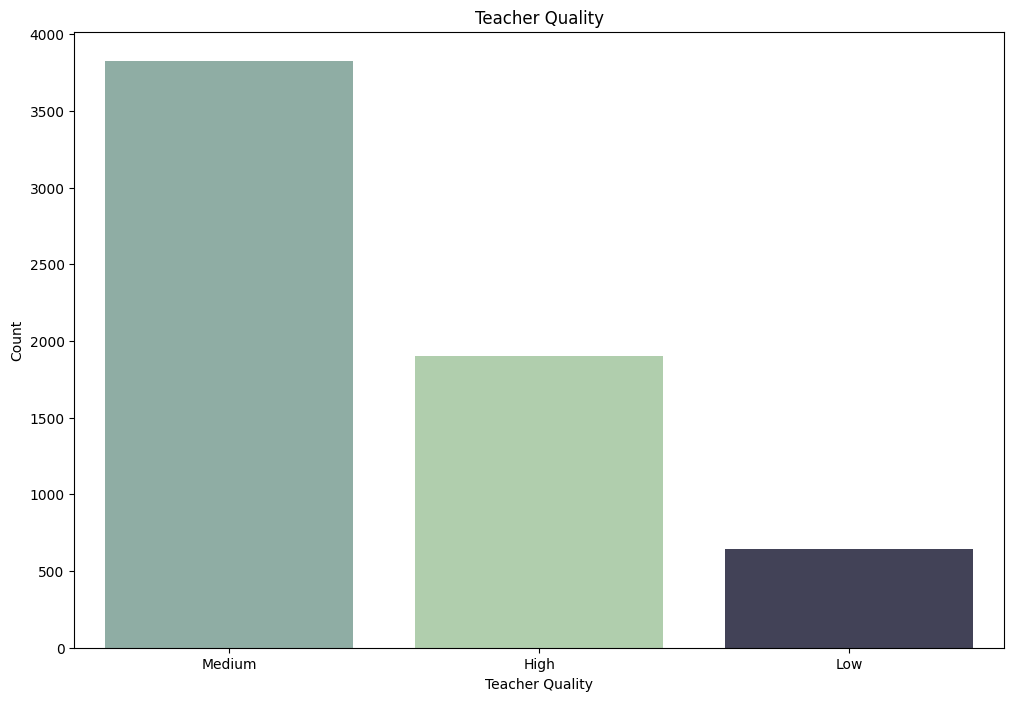

In [30]:
colors = ["#8AB2A6", "#ACD3A8", "#3E3F5B"]
count_plot_categ("Teacher_Quality", colors, df,
                 "Teacher Quality",
                 "Teacher Quality",
                 "Count")

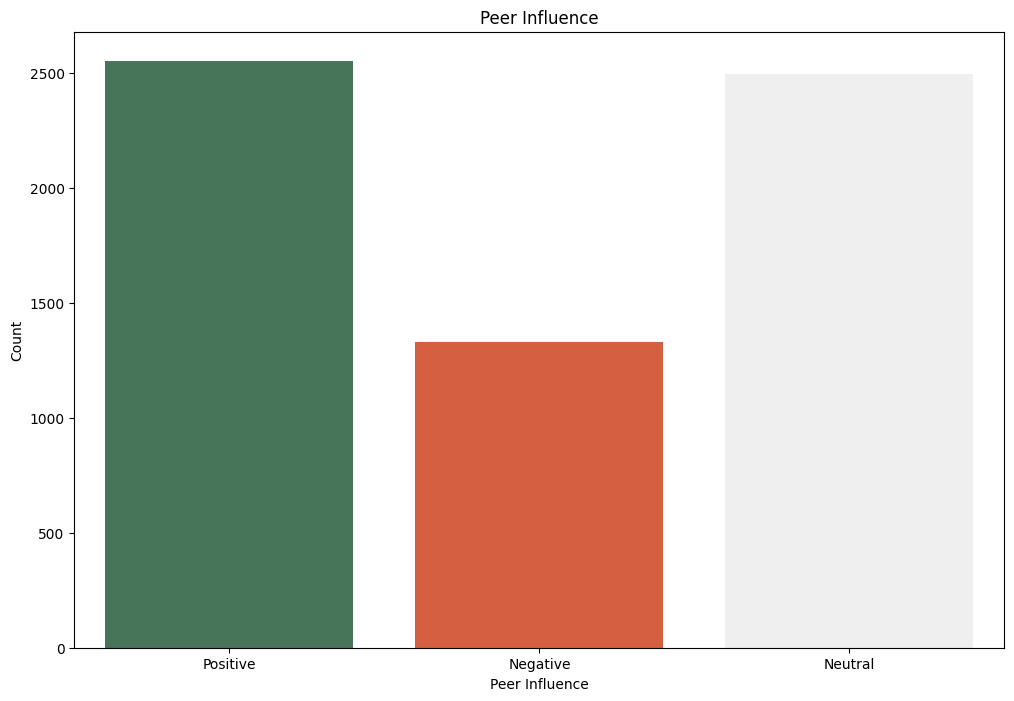

In [31]:
colors = ["#3F7D58", "#EC5228", "#EFEFEF"]
count_plot_categ("Peer_Influence", colors, df,
                 "Peer Influence",
                 "Peer Influence",
                 "Count")

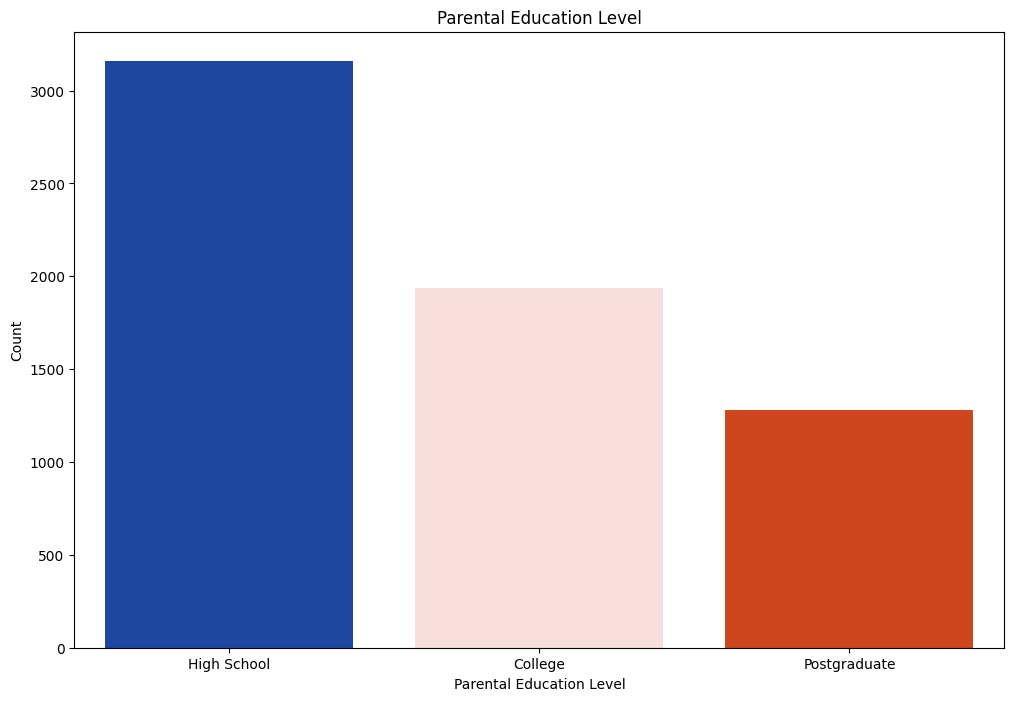

In [32]:
colors = ["#093FB4", "#FFD8D8", "#ED3500"]
count_plot_categ("Parental_Education_Level", colors, df,
                 "Parental Education Level",
                 "Parental Education Level",
                 "Count")

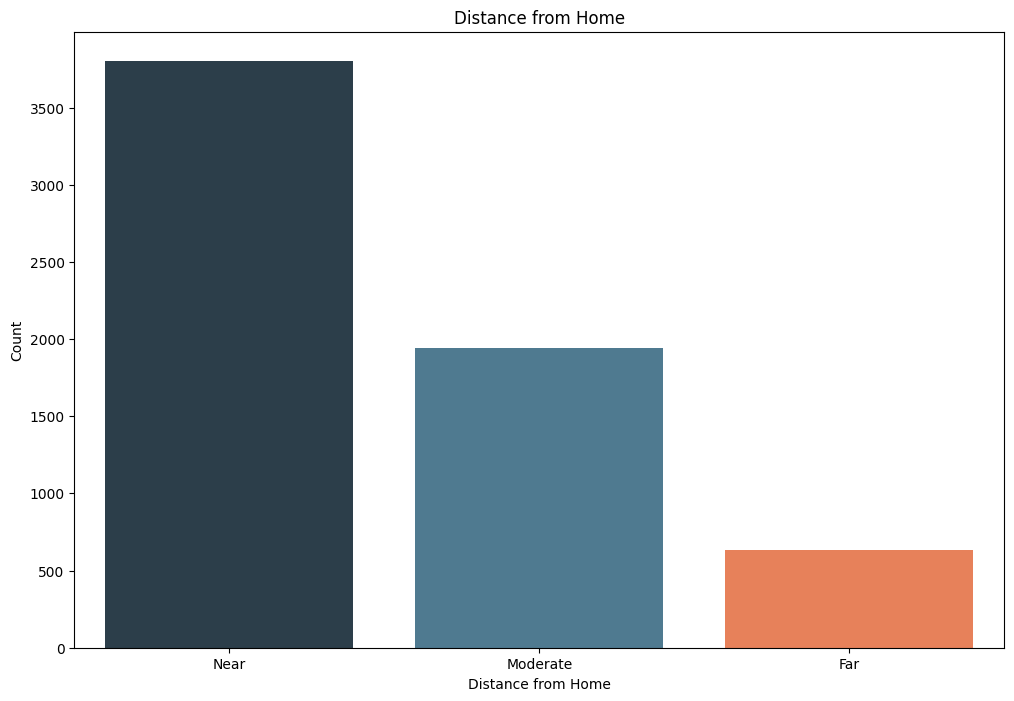

In [33]:
colors = ["#273F4F", "#447D9B", "#FE7743"]
count_plot_categ("Distance_from_Home", colors, df,
                 "Distance from Home",
                 "Distance from Home",
                 "Count")

## - Numerical Features

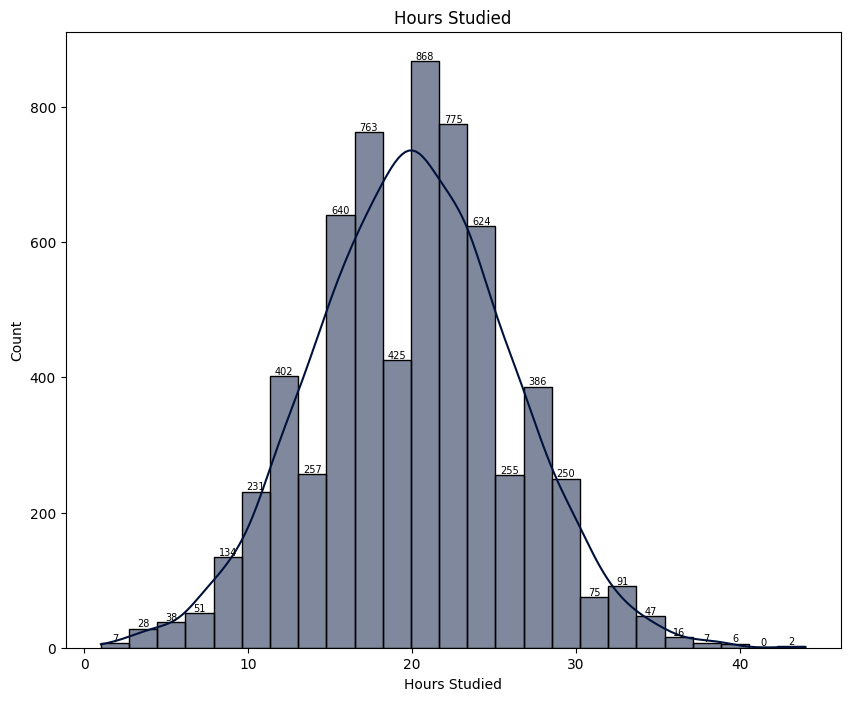

In [34]:
color = "#00123b"
hist_plot_num("Hours_Studied", color, df, 25, "Hours Studied", "Hours Studied")

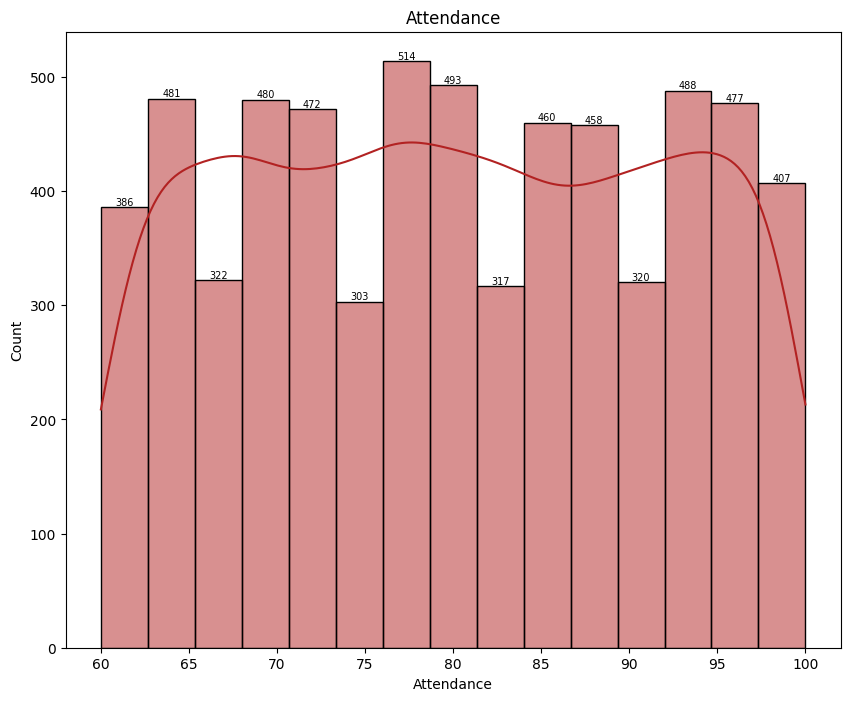

In [35]:
color = "#B22222"
hist_plot_num("Attendance", color, df, 15, "Attendance", "Attendance")

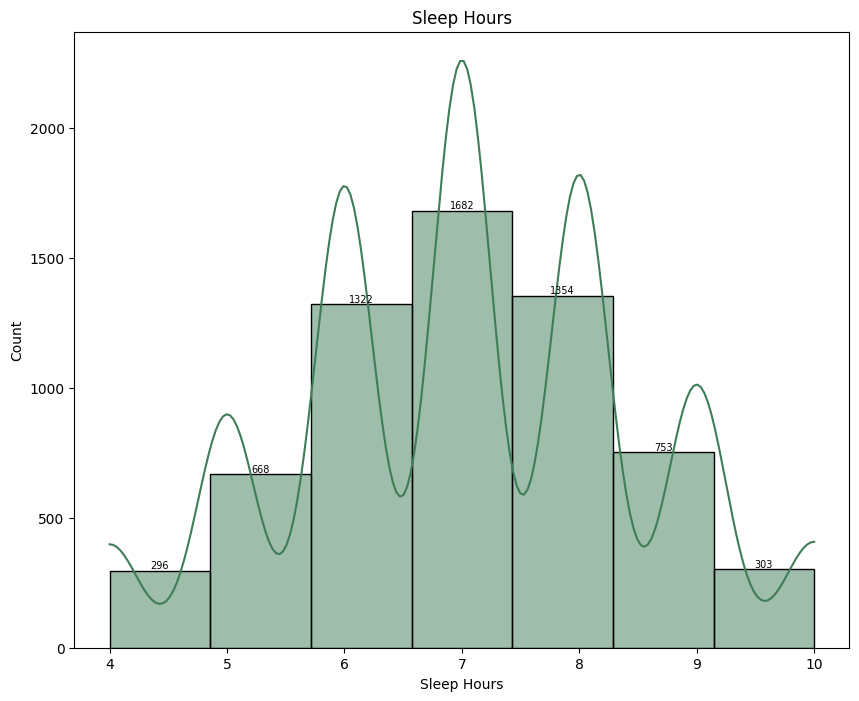

In [36]:
color = "#3F7D58"
hist_plot_num("Sleep_Hours", color, df, 7, "Sleep Hours", "Sleep Hours")

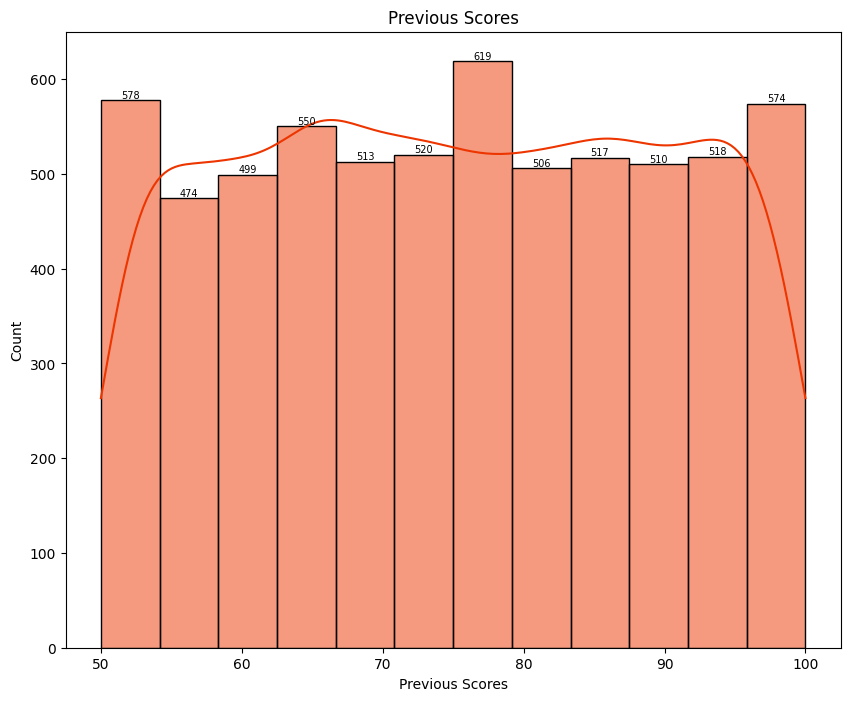

In [37]:
color = "#ED3500"
hist_plot_num("Previous_Scores", color, df, 12,"Previous Scores", "Previous Scores")

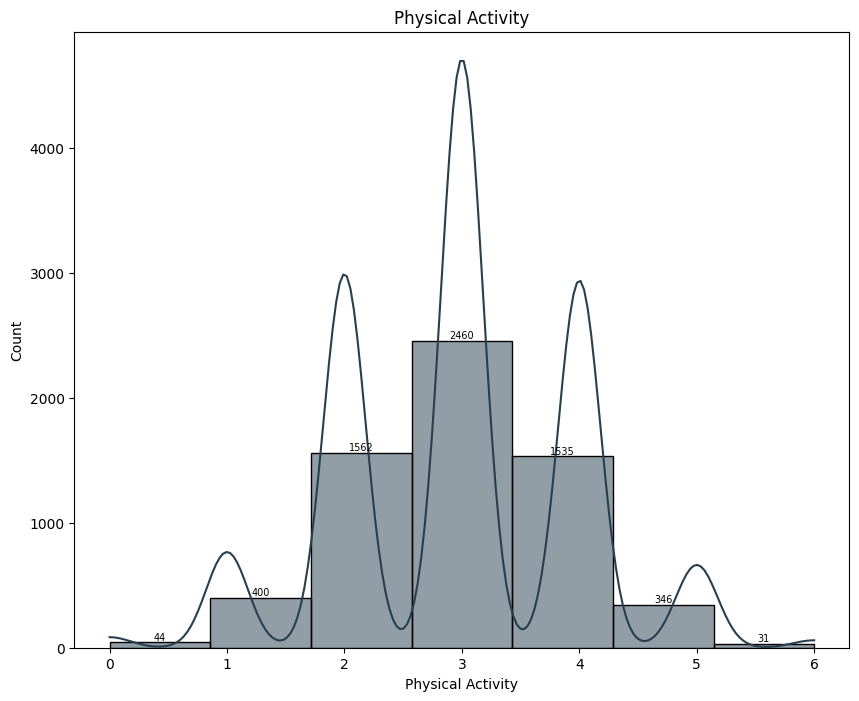

In [38]:
color = "#273F4F"
hist_plot_num("Physical_Activity", color, df, 7,"Physical Activity", "Physical Activity")

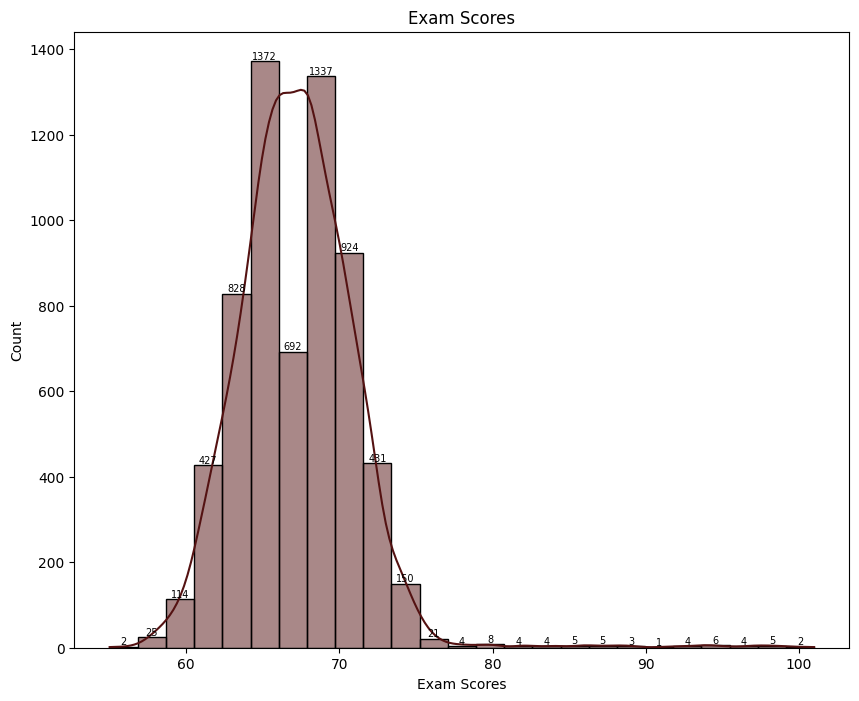

In [39]:
color = "#541212"
hist_plot_num("Exam_Score", color, df, 25,"Exam Scores", "Exam Scores")

# 6- **Check for Outliers**

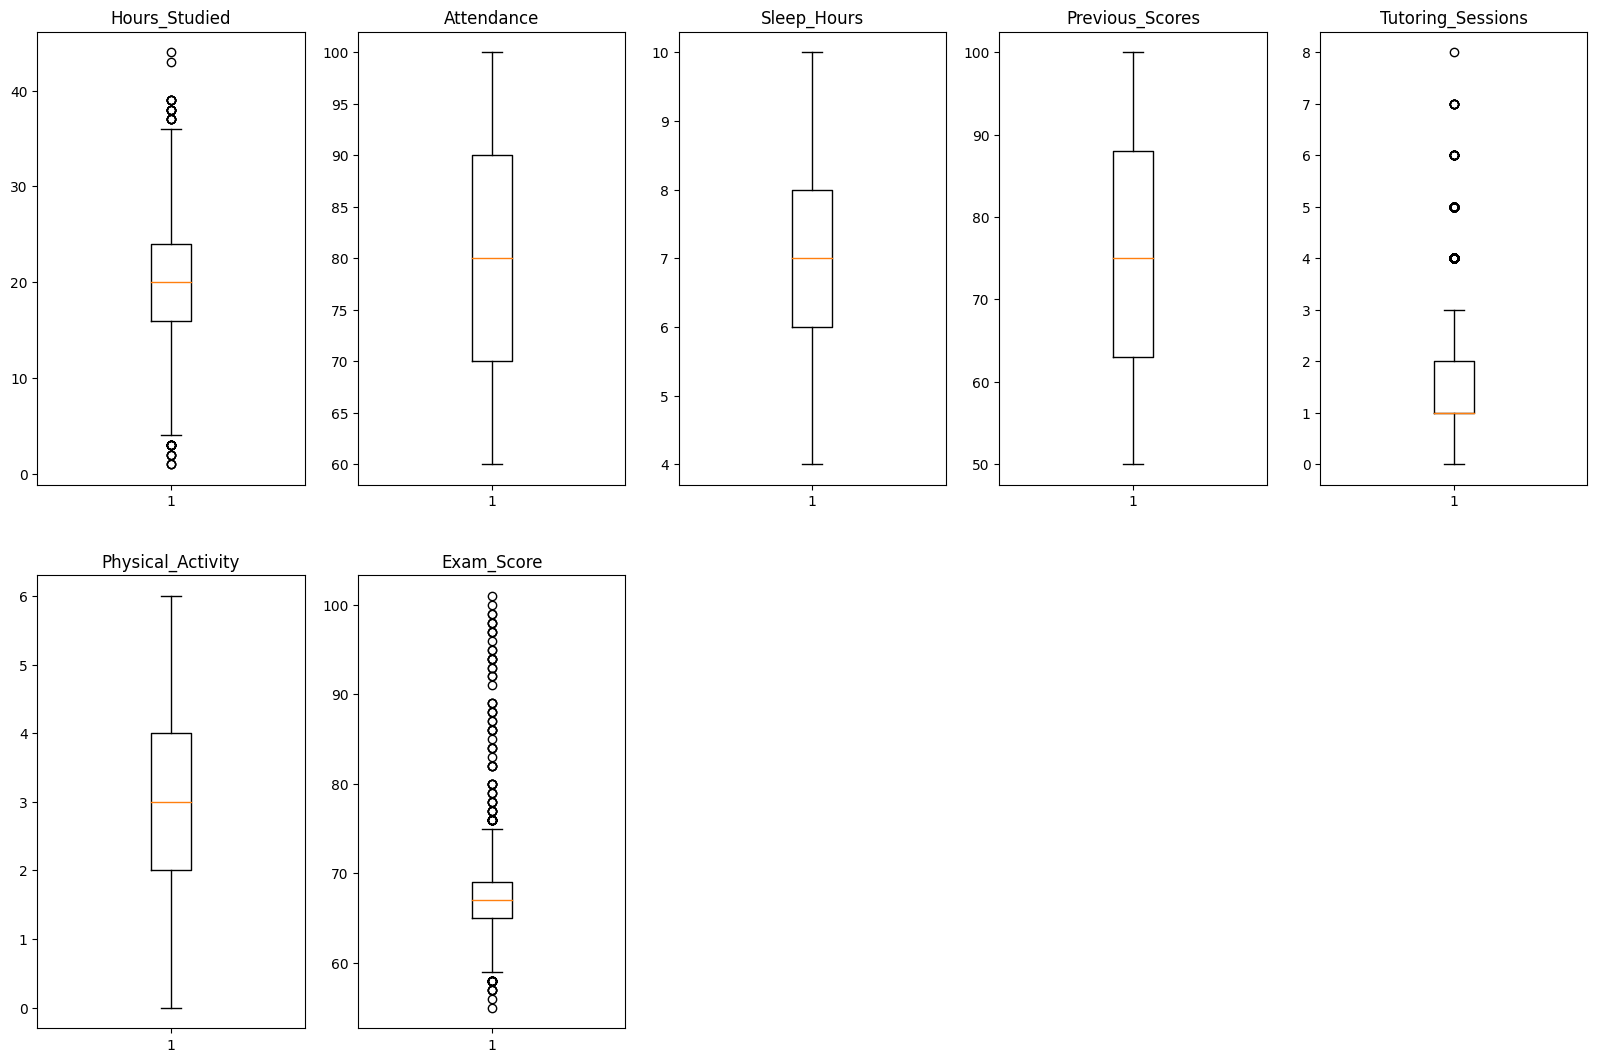

In [40]:
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 5, i+1)
    plt.boxplot(df[col])
    plt.title(f"{col}")
    
plt.show()

In [41]:
for col in numerical_features:
    data_cols = df[col]
    Q1 = data_cols.quantile(0.25)
    Q3 = data_cols.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_boundary = Q1 - (1.5 * IQR)
    upper_boundary = Q3 + (1.5 * IQR)

    lower_vals = df[df[col] < lower_boundary][col].values
    upper_vals = df[df[col] > upper_boundary][col].values

    df[col] = df[col].replace(lower_vals, lower_boundary)
    df[col] = df[col].replace(upper_vals, upper_boundary)

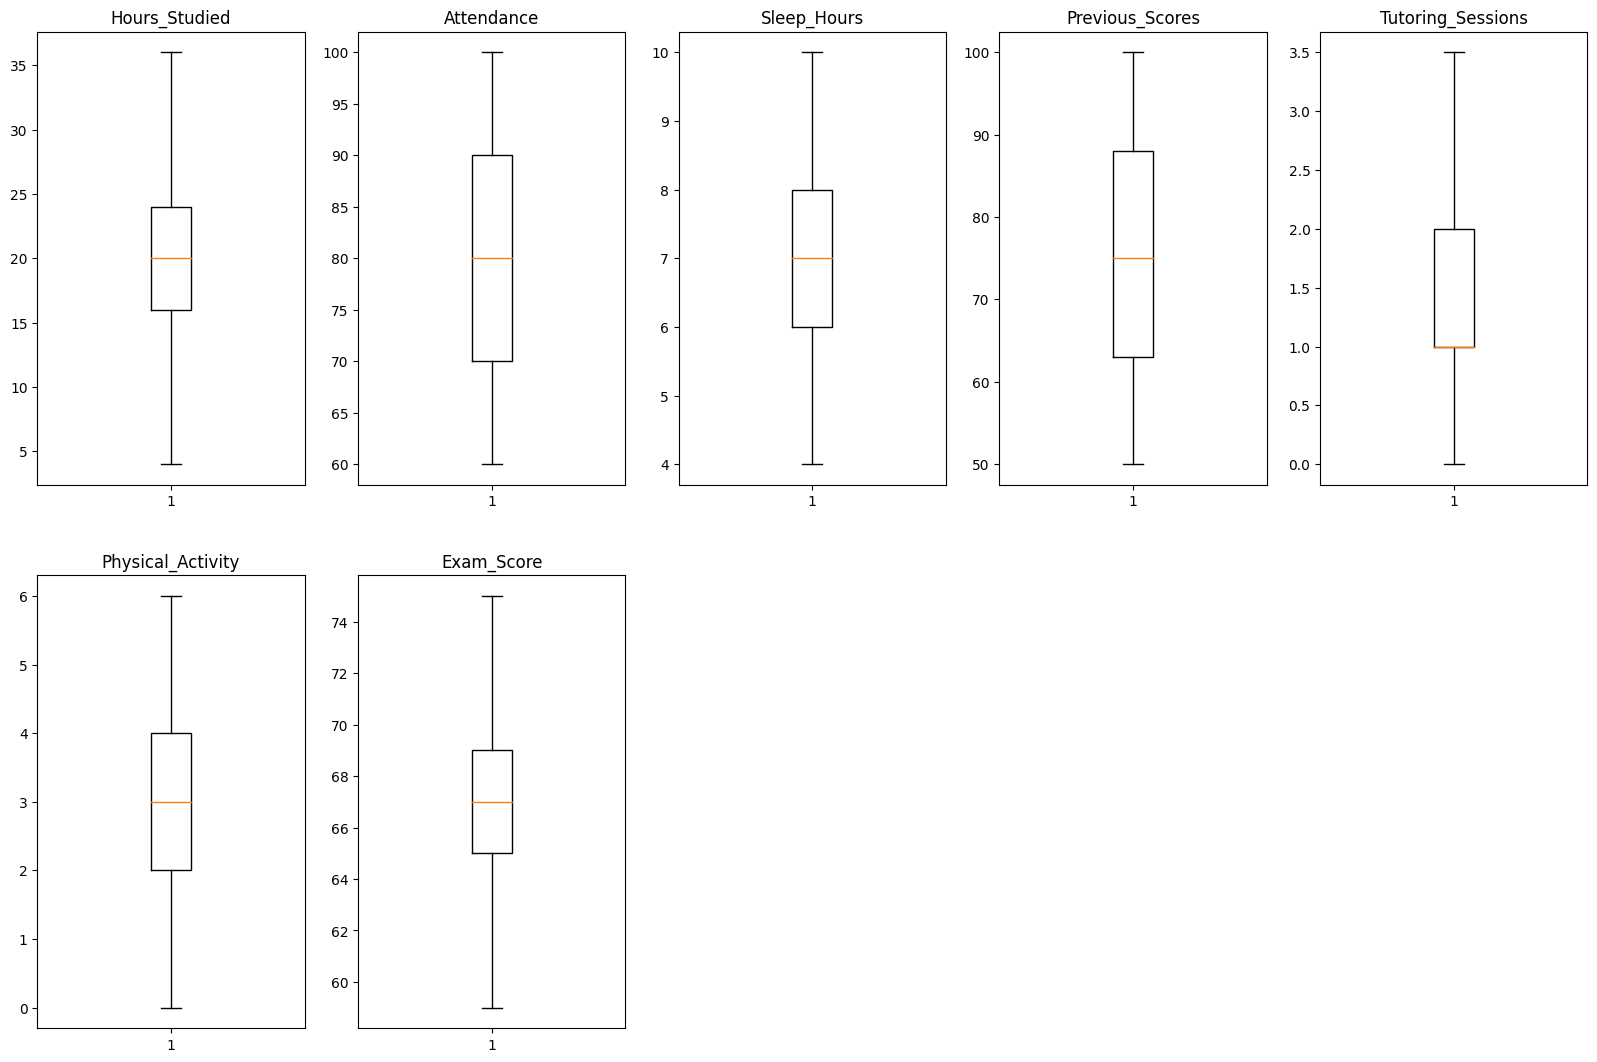

In [42]:
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 5, i+1)
    plt.boxplot(df[col])
    plt.title(f"{col}")
    
plt.show()

# 7- **Feature Mapping**

In [43]:
mapping_gender = {"Male" : 0, "Female" : 1}
mapping_lmh = {"Low":0, "Medium":1, "High":2}
mapping_y_n = {"Yes": 0, "No":1}
mapping_school_type = {"Public":0, "Private":1}
mapping_pos_neg = {"Negative":0, "Neutral":1, "Positive":2}
mapping_edu_lvl = {"High School":0, "College":1, "Postgraduate":2}
mapping_dist_from_home = {"Near":0, "Moderate":1, "Far":2}

In [44]:
df["Gender"] = df["Gender"].map(mapping_gender)
df["Parental_Involvement"] = df["Parental_Involvement"].map(mapping_lmh)
df["Access_to_Resources"] = df["Access_to_Resources"].map(mapping_lmh)
df["Motivation_Level"] = df["Motivation_Level"].map(mapping_lmh)
df["Family_Income"] = df["Family_Income"].map(mapping_lmh)
df["Teacher_Quality"] = df["Teacher_Quality"].map(mapping_lmh)
df["Internet_Access"] = df["Internet_Access"].map(mapping_y_n)
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map(mapping_y_n)
df["Learning_Disabilities"] = df["Learning_Disabilities"].map(mapping_y_n)
df["School_Type"] = df["School_Type"].map(mapping_school_type)
df["Parental_Education_Level"] = df["Parental_Education_Level"].map(mapping_edu_lvl)
df["Distance_from_Home"] = df["Distance_from_Home"].map(mapping_dist_from_home)
df["Peer_Influence"] = df["Peer_Influence"].map(mapping_pos_neg) 

In [45]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,1,7,73,0,0,0.0,0,1,0,2,3,1,0,0,0,67
1,19,64,0,1,1,8,59,0,0,2.0,1,1,0,0,4,1,1,1,1,61
2,24,98,1,1,0,7,91,1,0,2.0,1,1,0,1,4,1,2,0,0,74
3,29,89,0,1,0,8,98,1,0,1.0,1,1,0,0,4,1,0,1,0,71
4,19,92,1,1,0,6,65,1,0,3.0,1,2,0,1,4,1,1,0,1,70
5,19,88,1,1,0,8,89,1,0,3.0,1,1,0,2,3,1,2,0,0,71
6,29,84,1,0,0,7,68,0,0,1.0,0,1,1,1,2,1,0,1,0,67
7,25,78,0,2,0,6,50,1,0,1.0,2,2,0,0,2,1,0,2,0,66
8,17,94,1,2,1,6,80,2,0,0.0,1,0,1,1,1,1,1,0,0,69
9,23,98,1,1,0,8,71,1,0,0.0,2,2,0,2,5,1,0,1,0,72


# 8- **Data Splitting**

In [46]:
X = df.drop(columns = ["Exam_Score"])
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 9- **Model Predictions**

In [48]:
y_pred = model.predict(X_test)

In [49]:
dfnew = pd.DataFrame({"Y test" : y_test, "Y predict" : y_pred})
dfnew.head(10)

,Y test,Y predict
2814,74,73.629934
4421,66,66.105487
4282,70,70.353076
1246,72,71.837524
4699,67,67.385139
235,69,69.440955
1679,72,72.133280
300,66,66.234476
5600,69,68.558396
5444,68,67.724394


# 10- **Model Scores**

In [50]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [51]:
df_scores = pd.DataFrame({
    "Model": ["Linear Regression"],
    "R² score": [r2],
    "MSE": [mse],
    "RMSE": [rmse],
    "MAE": [mae]
})

df_scores

,Model,R² score,MSE,RMSE,MAE
0,Linear Regression,0.931807,0.797012,0.892755,0.362324


## - **Predictions Visualization**

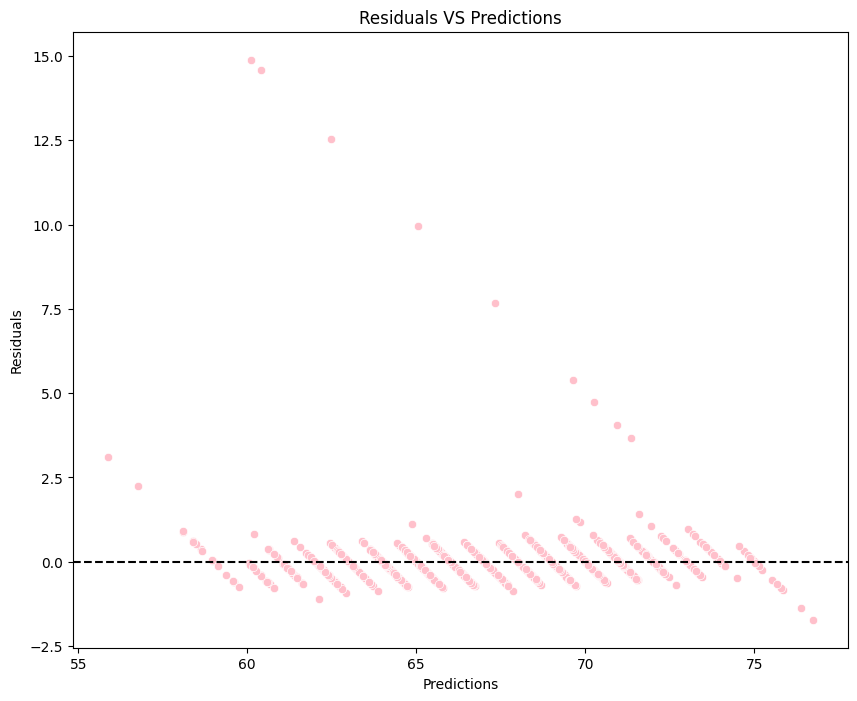

In [52]:
residuals = y_test-y_pred
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_pred, y=residuals, color="pink")
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals VS Predictions")
plt.show()

# **BONUS WORK**

# 1- Polynomial Regression  `degree = 1`

In [53]:
X = df.drop(columns = ["Exam_Score"])
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## - **Applying ***PolynomialFeatures*** on the data**

In [54]:
poly_ft = PolynomialFeatures(degree=1)
X_train_poly = poly_ft.fit_transform(X_train)
X_test_poly = poly_ft.transform(X_test)

In [55]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

## 1. **Model Predictions**

In [56]:
y_pred = model.predict(X_test_poly)

In [57]:
dfnew = pd.DataFrame({"Y test" : y_test, "Y predict" : y_pred})
dfnew.head(10)

,Y test,Y predict
2814,74,73.629934
4421,66,66.105487
4282,70,70.353076
1246,72,71.837524
4699,67,67.385139
235,69,69.440955
1679,72,72.133280
300,66,66.234476
5600,69,68.558396
5444,68,67.724394


## 2. **Model Scores**

In [58]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [59]:
df_scores = pd.DataFrame({
    "Model": ["Linear Regression"],
    "R² score": [r2],
    "MSE": [mse],
    "RMSE": [rmse],
    "MAE": [mae]
})

df_scores

,Model,R² score,MSE,RMSE,MAE
0,Linear Regression,0.931807,0.797012,0.892755,0.362324


## 3. **Model Predictions Visualization**

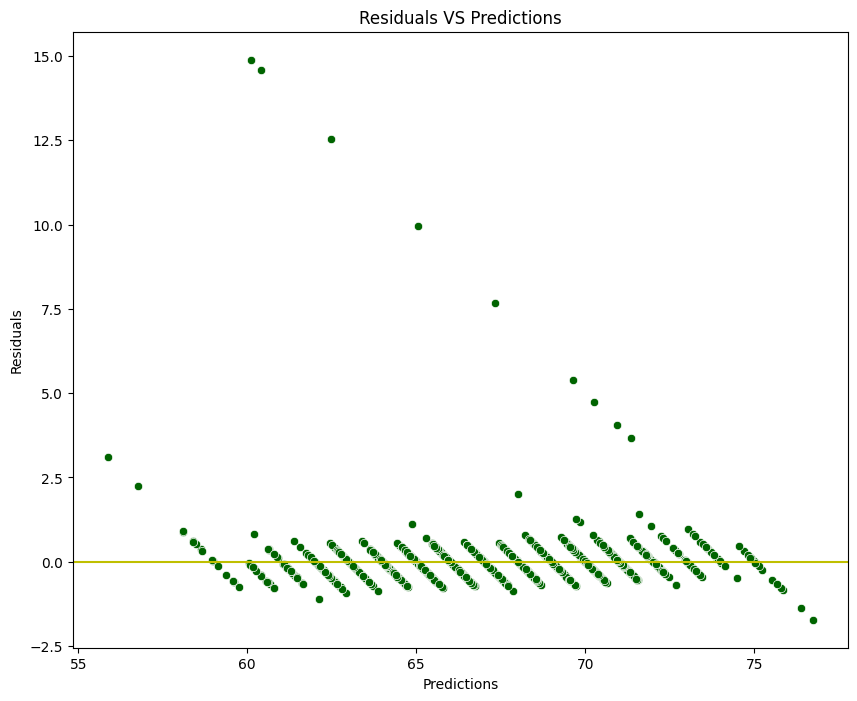

In [60]:
residuals = y_test-y_pred
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_pred, y=residuals, color="darkgreen")
plt.axhline(0, color='y', linestyle='-')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals VS Predictions")
plt.show()

# 2- Polynomial Regression  `degree = 2`

In [61]:
poly_ft = PolynomialFeatures(degree=2)
X_train_poly2 = poly_ft.fit_transform(X_train)
X_test_poly2 = poly_ft.transform(X_test)

In [62]:
model = LinearRegression()
model.fit(X_train_poly2, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test_poly2)

## 1- **Model Predictions**

In [64]:
dfnew = pd.DataFrame({"Y test" : y_test, "Y predict" : y_pred})
dfnew.head(10)

,Y test,Y predict
2814,74,73.912060
4421,66,65.927513
4282,70,70.414196
1246,72,71.635368
4699,67,67.644288
235,69,69.429459
1679,72,72.136675
300,66,66.473666
5600,69,68.479814
5444,68,68.254767


In [65]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

## 2- **Model Scores**    

In [66]:
df_scores = pd.DataFrame({
    "Model": ["Linear Regression"],
    "R² score": [r2],
    "MSE": [mse],
    "RMSE": [rmse],
    "MAE": [mae]
})

df_scores

,Model,R² score,MSE,RMSE,MAE
0,Linear Regression,0.927222,0.850607,0.922284,0.394955


## 3- **Model Predictions Visualization**

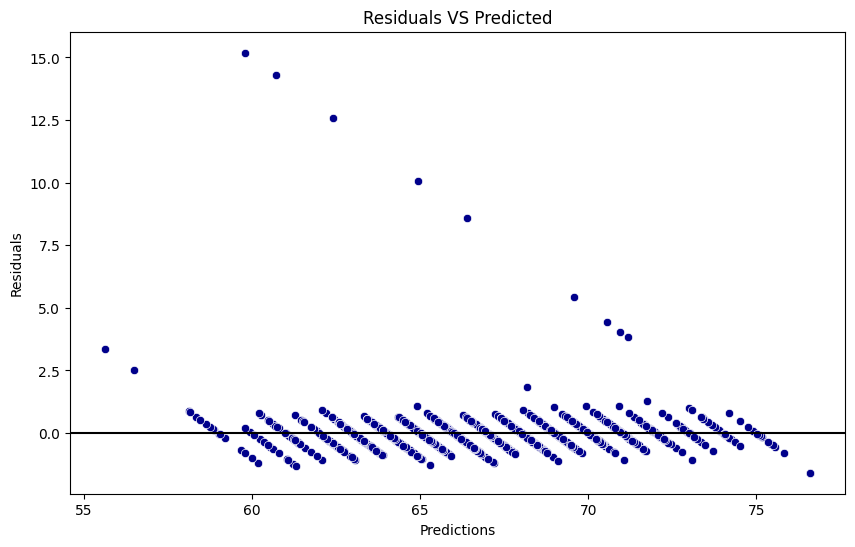

In [67]:
residuals = y_test-y_pred
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals, color="darkblue")
plt.axhline(0, color='k', linestyle='-')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals VS Predicted")
plt.show()

####  The Linear Regression model performs slightly better than the Polynomial Regression at `degree = 2`, and performs exactly the same at `degree = 1`, which means Polynomial Regression isn't really needed and Linear Regression model should be enough

# 3- **Feature Experimenting**

In [68]:
df_copy = df
df_copy.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,1,7,73,0,0,0.0,0,1,0,2,3,1,0,0,0,67
1,19,64,0,1,1,8,59,0,0,2.0,1,1,0,0,4,1,1,1,1,61
2,24,98,1,1,0,7,91,1,0,2.0,1,1,0,1,4,1,2,0,0,74
3,29,89,0,1,0,8,98,1,0,1.0,1,1,0,0,4,1,0,1,0,71
4,19,92,1,1,0,6,65,1,0,3.0,1,2,0,1,4,1,1,0,1,70


## - **Heatmap Plot** 

#### The heatmap will help us see the correlation between the numerical features and the target

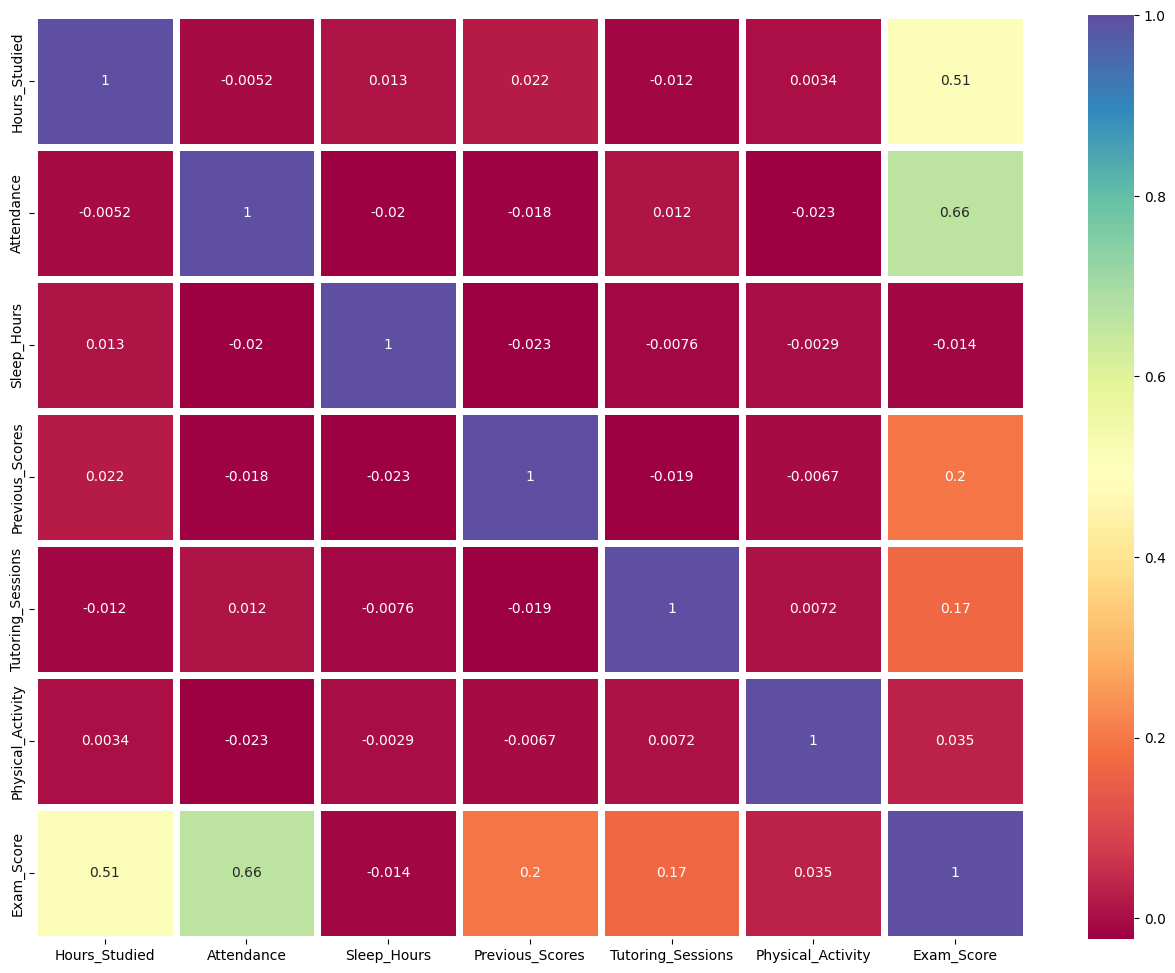

In [69]:
plt.figure(figsize = (16, 12))
sns.heatmap(df_copy[numerical_features].corr(), cmap='Spectral', linewidths= 5, annot = True)
plt.show()

## 1- Experiment with removing features with low correlation with the target

In [70]:
df_copy = df_copy.drop(columns=["Sleep_Hours"])

In [71]:
X = df_copy.drop(columns = ["Exam_Score"])
y = df_copy["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model

LinearRegression()

In [73]:
model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = model.predict(X_test)

## 2- Model Predictions after dropping the `Sleep Hours` feature

In [75]:
dfnew = pd.DataFrame({"Y test" : y_test, "Y predict" : y_pred})
dfnew.head(10)

,Y test,Y predict
2814,74,73.624838
4421,66,66.100459
4282,70,70.348132
1246,72,71.837332
4699,67,67.382983
235,69,69.441150
1679,72,72.133442
300,66,66.231940
5600,69,68.560920
5444,68,67.726790


In [76]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

## 3- Model Scores

In [77]:
df_scores = pd.DataFrame({
    "Model": ["Linear Regression"],
    "R² score": [r2],
    "MSE": [mse],
    "RMSE": [rmse],
    "MAE": [mae]
})

df_scores

,Model,R² score,MSE,RMSE,MAE
0,Linear Regression,0.931777,0.797369,0.892955,0.362401


### Dropping the Sleep Hours feature made the R² slightly drop

## 4- Model Predictions Visualization

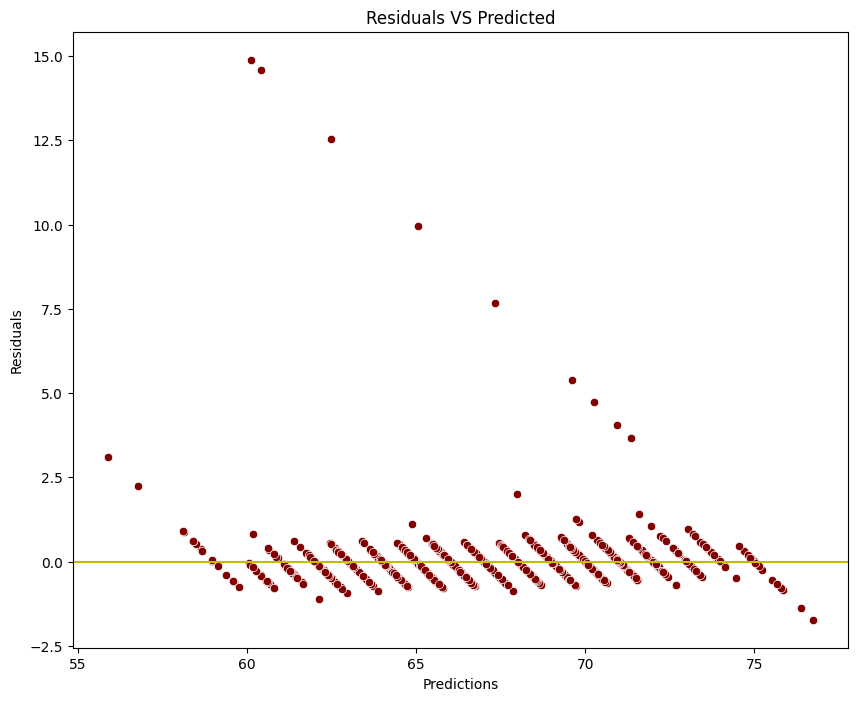

In [78]:
residuals = y_test-y_pred
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_pred, y=residuals, color="maroon")
plt.axhline(0, color='y', linestyle='-')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals VS Predicted")
plt.show()

### The model performs best using the Linear Regression model and using the Polynomial Regression at `degree = 1`, otherwise, the R² value slightly drops

In [79]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']